In [1]:
#import necessary libraries
import pandas as pd
import ee
import geopandas as gpd

In [2]:
# Initialize the Earth Engine module.
ee.Initialize()

In [9]:
#read in the data
df = pd.read_csv("data/computed_stats/methane_africa_cleaned.csv")
df.head()

,country_co,country_na,mean,month
0,CD,Chad,0.000099,2018-11
1,MI,Malawi,0.000174,2018-11
2,ZA,Zambia,0.000188,2018-11
3,ZI,Zimbabwe,0.000161,2018-11
4,BC,Botswana,0.000151,2018-11


In [10]:
#change the mean column to mean_ppm
df['mean_ppm'] = df['mean'] / 1000

In [11]:
df.head()

,country_co,country_na,mean,month,mean_ppm
0,CD,Chad,0.000099,2018-11,9.931083e-08
1,MI,Malawi,0.000174,2018-11,1.736424e-07
2,ZA,Zambia,0.000188,2018-11,1.876489e-07
3,ZI,Zimbabwe,0.000161,2018-11,1.611908e-07
4,BC,Botswana,0.000151,2018-11,1.505258e-07


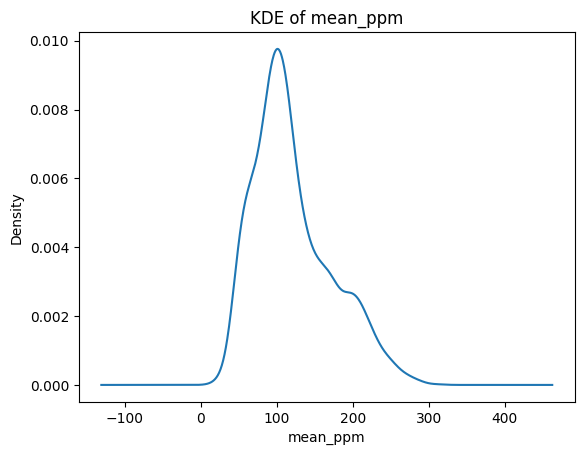

In [14]:
#Visualizing the distribution of the mean_ppm column
df['mean_ppm'].plot.kde()
import matplotlib.pyplot as plt

plt.title('KDE of mean_ppm')
plt.xlabel('mean_ppm')
plt.ylabel('Density')
plt.show()

In [15]:
#perfrom the Shapiro-Wilk test for normality
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test
stat, p_value = shapiro(df['mean_ppm'])

print(f'Statistic: {stat}, p-value: {p_value}')

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistic: 0.9496448110054798, p-value: 2.151825653608764e-36
Sample does not look Gaussian (reject H0)


In [2]:
methane_counties = pd.read_csv("data/computed_stats/kenyan_counties_methane_monthly.csv")

In [3]:
methane_counties["mean_ppm"] = methane_counties["mean"] / 1000
methane_counties.head()

,COUNTY,mean,month,mean_ppm
0,Turkana,1855.800720,2019-03,1.855801
1,Marsabit,1852.726949,2019-03,1.852727
2,Mandera,1856.138733,2019-03,1.856139
3,Wajir,1856.712832,2019-03,1.856713
4,West Pokot,1845.439213,2019-03,1.845439


In [5]:
fm = pd.read_csv("data/computed_stats/kenyan_counties_formaldehyde_monthly.csv")

In [7]:
fm.head()

,COUNTY,mean,month
0,Turkana,0.000105,2018-11
1,Marsabit,0.000091,2018-11
2,Mandera,0.000085,2018-11
3,Wajir,0.000088,2018-11
4,West Pokot,0.000100,2018-11
